## Simulated Data

In order to test our lib, it will be helpful to generate random data that behave in known fashion (linearly, quadratic etc.)

This notebook contains the thought process of creating the functions to generate the data

### 2 variable function

For now, the functions will not be generic for n sized polynomials. We can do it later by assing a list of coefcients; if 2 are passed it is linear:
    * [3, 4] --> ax + b  -->  3x + 4
    
if 3 are passed it is quadratic:
    * [3, 4, 5] --> ax^2 + bx + c --> 3x^2 + 4x + 5

In [1]:
import numpy as np

def linear_2_uniform_error(a, b, sample_size=100, x0=0, xmax=100, error_low=-1, error_high=1):
    """ y = ax + b + error """
    
    # there has to be a better way than to use numbers from 0 to xmax divided by sample size
    x = np.linspace(x0, xmax, sample_size, endpoint=True)
    error = np.random.uniform(error_low, error_high, sample_size)
    y = a*x + b + error
    return x, y

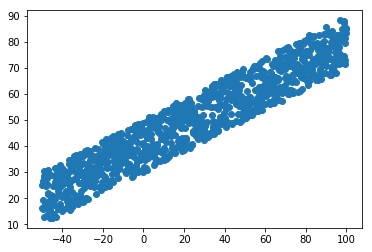

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
x1, y1 = linear_2_uniform_error(.4, 40, sample_size=1000, x0=-50, xmax=100, error_low=-10, error_high=10)
plt.plot(x1, y1, "o")


Seems a bit weird with the uniform error, lets try the normal error

In [3]:
def linear_2_normal_error(a, b, sample_size=100, x0=0, xmax=100, mu=0, sigma=1):
    """ y = ax + b + error """
    
    # there has to be a better way than to use numbers from 0 to xmax divided by sample size
    x = np.linspace(x0, xmax, sample_size, endpoint=True)
    error = np.random.normal(mu, sigma, sample_size)
    y = a*x + b + error
    return x, y

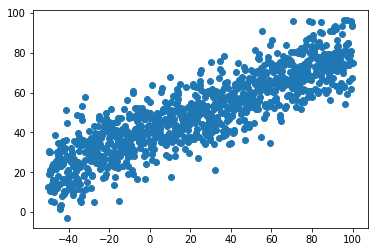

In [4]:
x2, y2 = linear_2_normal_error(.4, 40, sample_size=1000, x0=-50, xmax=100, mu=0, sigma =10)
plt.plot(x2, y2, "o")


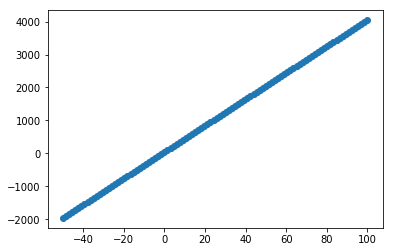

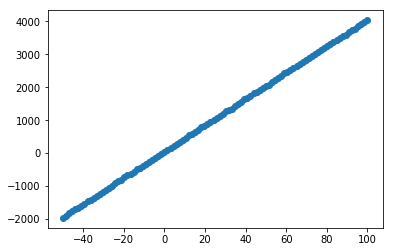

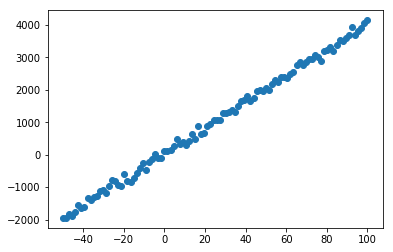

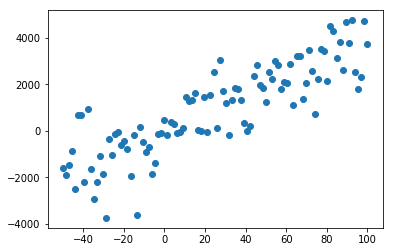

In [5]:
for sigma in [1, 10, 100, 1000]:
    x2, y2 = linear_2_normal_error(40, 40, sample_size=100, x0=-50, xmax=100, mu=0, sigma=sigma)
    plt.plot(x2, y2, "o")
    plt.show()

Seems better! What will happen if we add the error to x as well?

In [6]:
def linear_2_normal_error_(a, b, sample_size=100, x0=0, xmax=100, mu=0, sigma=1):
    """ y = a(x+error) + b + error  """
    
    # there has to be a better way than to use numbers from 0 to xmax divided by sample size
    x = np.linspace(x0, xmax, sample_size, endpoint=True)
    error = np.random.normal(mu, sigma, sample_size)
    y = a*(x+error) + b + error
    return x, y

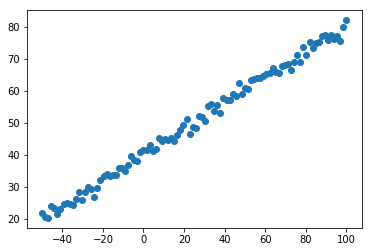

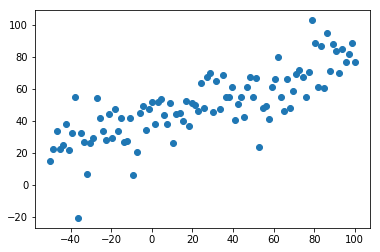

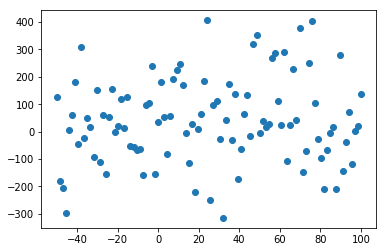

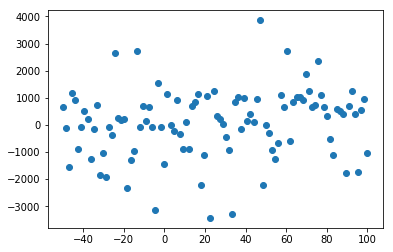

In [7]:
for sigma in [1, 10, 100, 1000]:
    x2, y2 = linear_2_normal_error_(.4, 40, sample_size=100, x0=-50, xmax=100, mu=0, sigma=sigma)
    plt.plot(x2, y2, "o")
    plt.show()

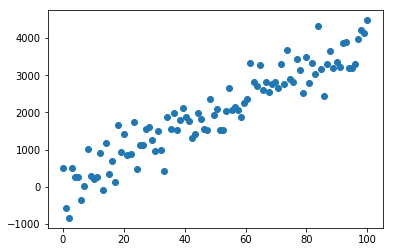

In [8]:
x2, y2 = linear_2_normal_error_(40, 40, sample_size=100, x0=0, xmax=100, mu=0, sigma=10)
plt.plot(x2, y2, "o")

Interesting, maybe we can use different errors for each coef?

Lets try the quadratic now, using normal errors

In [9]:
def quadratic_2_uniform_error(a, b, c, sample_size=100, x0=0, xmax=100, mu=0, sigma=1):
    """ y = axˆ2 + bx + c + error """
    
    # there has to be a better way than to use numbers from 0 to xmax divided by sample size
    x = np.linspace(x0, xmax, sample_size, endpoint=True)
    error = np.random.normal(mu, sigma, sample_size)
    y = a*x*x + b*x + c + error
    return x, y

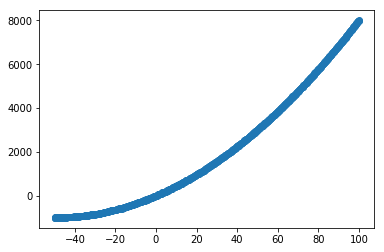

In [10]:
x2, y2 = quadratic_2_uniform_error(.4, 40, 10, sample_size=1000, x0=-50, xmax=100, mu=0, sigma =10)
plt.plot(x2, y2, "o")

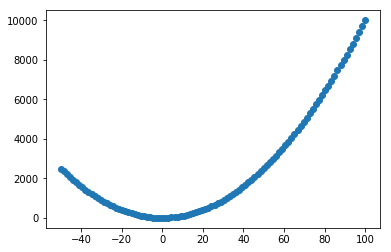

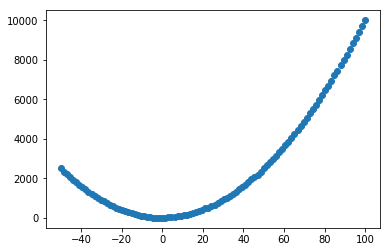

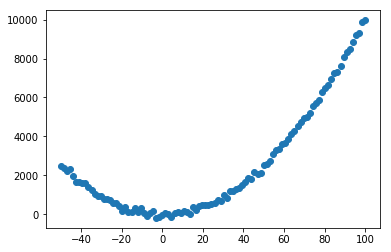

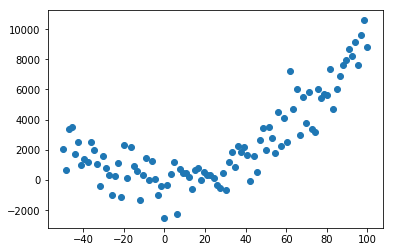

In [11]:
for sigma in [1, 10, 100, 1000]:
    x2, y2 = quadratic_2_uniform_error(1, 0, 0, sample_size=100, x0=-50, xmax=100, mu=0, sigma=sigma)
    plt.plot(x2, y2, "o")
    plt.show()

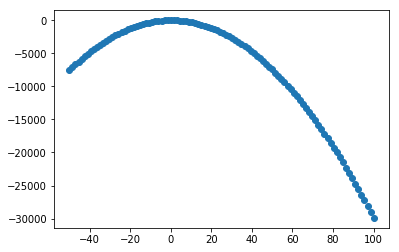

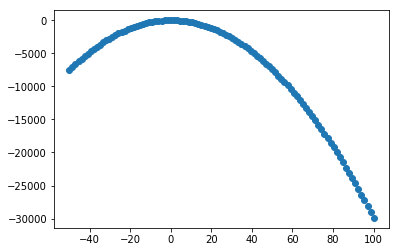

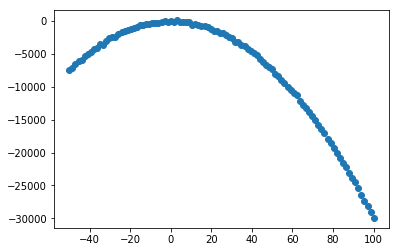

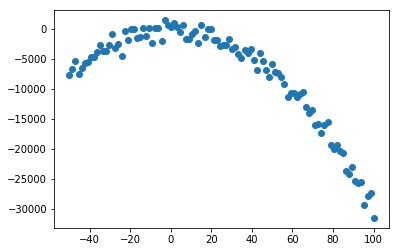

In [12]:
for sigma in [1, 10, 100, 1000]:
    x2, y2 = quadratic_2_uniform_error(-3, 1, 2, sample_size=100, x0=-50, xmax=100, mu=0, sigma=sigma)
    plt.plot(x2, y2, "o")
    plt.show()

### Making it a bit more general

In [13]:
def bivariable_polinomial(coeficients, sample_size=100, x0=0, xmax=100, mu=0, sigma=1):
    """ 
    Returns x, y numpy arrays in the form of
    
    [3, 4] --> ax + b  -->  3x + 4
    [3, 4, 5] --> ax^2 + bx + c --> 3x^2 + 4x + 5

    """

    # there has to be a better way than to use numbers from 0 to xmax divided by sample size
    x = np.linspace(x0, xmax, sample_size, endpoint=True)
    error = np.random.normal(mu, sigma, sample_size)

    # here we get the list of coeficients and for each one we will do
    # coeficient[i]*x^degree
    # since the enumerate function does not go down, we can make degree as coef.len() - i

    length = len(coeficients)
    y = error
    for degree, coef in enumerate(coeficients):
        if length - degree > 1:
            y += coef*np.power(x, (length - degree - 1))
        else:
            y+= coef
    return x, y

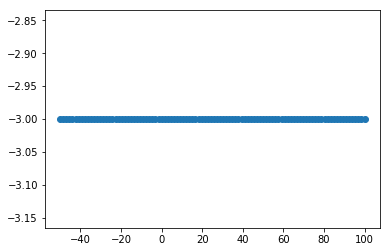

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x2, y2 = bivariable_polinomial([-3], sample_size=100, x0=-50, xmax=100, mu=0, sigma=0.0)
plt.plot(x2, y2, "o")

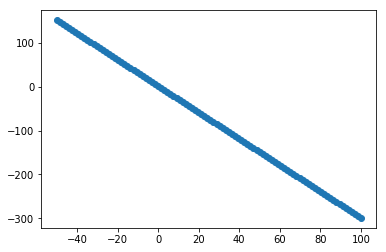

In [15]:
x2, y2 = bivariable_polinomial([-3, 1], sample_size=100, x0=-50, xmax=100, mu=0, sigma=0.0)
plt.plot(x2, y2, "o")

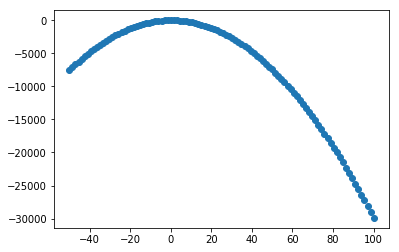

In [16]:
x2, y2 = bivariable_polinomial([-3, 1, 2], sample_size=100, x0=-50, xmax=100, mu=0, sigma=0.0)
plt.plot(x2, y2, "o")

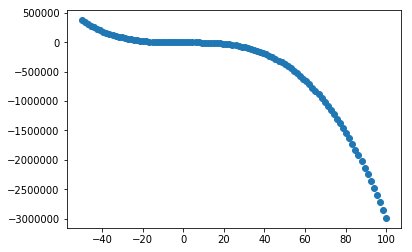

In [17]:
x2, y2 = bivariable_polinomial([-3, 1, 2, -4], sample_size=100, x0=-50, xmax=100, mu=0, sigma=0.0)
plt.plot(x2, y2, "o")

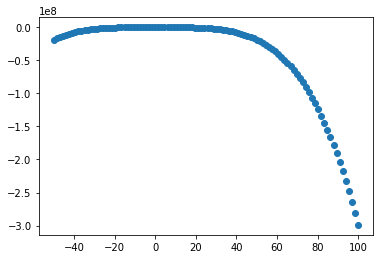

In [18]:
x2, y2 = bivariable_polinomial([-3, 1, 2, -4, 5], sample_size=100, x0=-50, xmax=100, mu=0, sigma=0.0)
plt.plot(x2, y2, "o")